# Working with a real world data-set using SQL and Python


##### Author: Kliz John Andrei Millares


## Objectives

My goal and task is to:

*   Understand the dataset for Chicago Public School level performance
*   Store the dataset in SQLite database.
*   Retrieve metadata about tables and columns and query data from mixed case columns
*   Solve example problems to practice my SQL skills including using built-in database functions

## Chicago Public Schools - Progress Report Cards (2011-2012)

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: [https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: [https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true](https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&download=true&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

**NOTE**:

Do not download the dataset directly from City of Chicago portal. Instead download a static copy which is a more database friendly version from this <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01">link</a>.



In [55]:
import csv, sqlite3

con = sqlite3.connect("RealWorldData.db")
cur = con.cursor()

In [56]:
%load_ext sql
%sql sqlite:///RealWorldData.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Store the dataset in a Table

##### I will first read the csv files from the downloaded files into pandas dataframes

##### Next I will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.


In [57]:

import pandas
df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv")
df.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False, method="multi")

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv")
df.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")



566

### Query the database system catalog to retrieve table metadata

In [58]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///RealWorldData.db
Done.


name
CENSUS_DATA
CHICAGO_CRIME_DATA
CHICAGO_PUBLIC_SCHOOLS_DATA


### Query the database system catalog to retrieve column metadata

##### The SCHOOLS table contains a large number of columns. How many columns does this table have?


In [59]:
%sql SELECT count(name) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

 * sqlite:///RealWorldData.db
Done.


count(name)
78


### Total number of crimes recorded in the CRIME table


In [60]:
%sql SELECT COUNT(*) FROM CHICAGO_CRIME_DATA;

 * sqlite:///RealWorldData.db
Done.


COUNT(*)
533


### Query to list community areas (name and number) with per capita income less than 11000

In [61]:
%sql SELECT COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME FROM CENSUS_DATA WHERE PER_CAPITA_INCOME < 11000;

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME
26.0,West Garfield Park
30.0,South Lawndale
37.0,Fuller Park
54.0,Riverdale


### List all case numbers for crimes involving a minor

In [62]:
%sql SELECT CASE_NUMBER FROM CHICAGO_CRIME_DATA WHERE DESCRIPTION LIKE '%MINOR%';

 * sqlite:///RealWorldData.db
Done.


CASE_NUMBER
HL266884
HK238408


### Query for identifying all kidnapping crimes involving a child?

In [63]:
%sql SELECT * FROM CHICAGO_CRIME_DATA WHERE PRIMARY_TYPE = 'KIDNAPPING' AND DESCRIPTION LIKE '%CHILD%';

 * sqlite:///RealWorldData.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


### Average Safety Score

In [64]:
%sql SELECT ROUND(AVG(SAFETY_SCORE), 2) AS AVERAGE_SAFETY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS_DATA;

 * sqlite:///RealWorldData.db
Done.


AVERAGE_SAFETY_SCORE
49.5


### 5 community areas with highest % of households below poverty line

In [65]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5;


 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
Riverdale
Fuller Park
Englewood
North Lawndale
East Garfield Park


### The community area with the most crime prone.

In [66]:
%sql SELECT COMMUNITY_AREA_NUMBER, COUNT(*) AS INCIDENT_COUNT FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER ORDER BY INCIDENT_COUNT DESC LIMIT 1;


 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,INCIDENT_COUNT
25.0,43


### Community area with highest hardship index

In [67]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA);


 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
Riverdale


### Determine the Community Area Name with most number of crimes

In [68]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA WHERE COMMUNITY_AREA_NUMBER = (SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 1);


 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
Austin


### Top 10 schools with the highest average of School Attendance

In [69]:
%sql select Name_of_School, Average_Student_Attendance from CHICAGO_PUBLIC_SCHOOLS_DATA \
    order by Average_Student_Attendance desc nulls last limit 10 

 * sqlite:///RealWorldData.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


###  List of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance

In [70]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     order by Average_Student_Attendance \
     LIMIT 5


 * sqlite:///RealWorldData.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
Velma F Thomas Early Childhood Center,None
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%


### Total College Enrollment for each Community Area

In [71]:
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name Limit 10;


 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


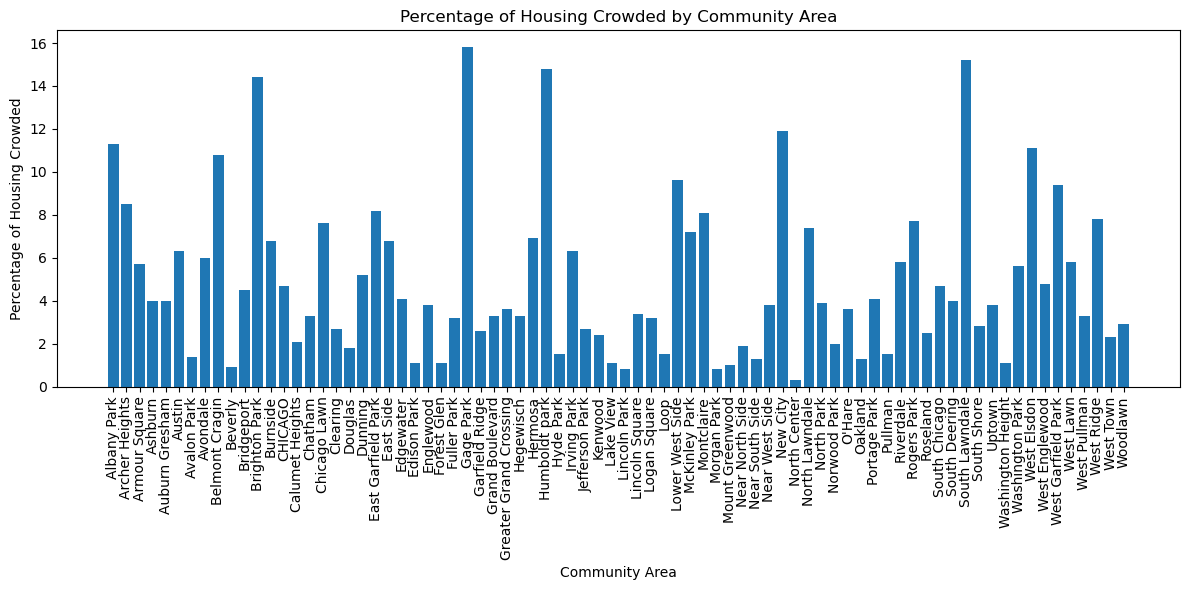

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
census_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
crime_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv")
schools_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv")

# Visualization 1: Bar chart of percentage of housing crowded by community area
census_data_sorted = census_data.sort_values(by='COMMUNITY_AREA_NAME')  # Sort by community area name
plt.figure(figsize=(12, 6))
plt.bar(census_data_sorted['COMMUNITY_AREA_NAME'], census_data_sorted['PERCENT_OF_HOUSING_CROWDED'])
plt.xticks(rotation=90)
plt.title('Percentage of Housing Crowded by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Percentage of Housing Crowded')
plt.tight_layout()
plt.show()

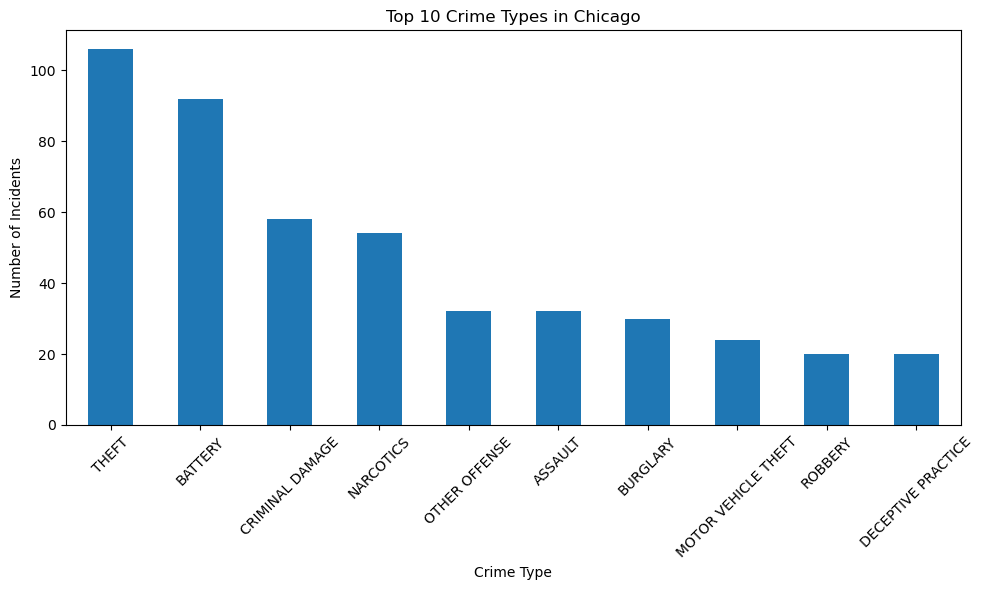

In [73]:
# Visualization 2: Crime types count
crime_counts = crime_data['PRIMARY_TYPE'].value_counts().head(10)  # Top 10 crime types
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Top 10 Crime Types in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

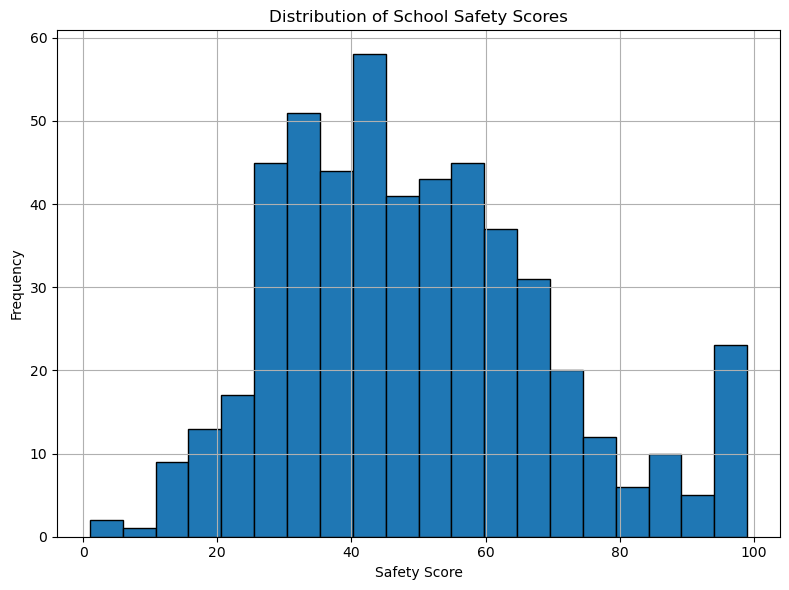

In [75]:
# Visualization 3: School safety scores distribution
plt.figure(figsize=(8, 6))
plt.hist(schools_data['SAFETY_SCORE'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of School Safety Scores')
plt.xlabel('Safety Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

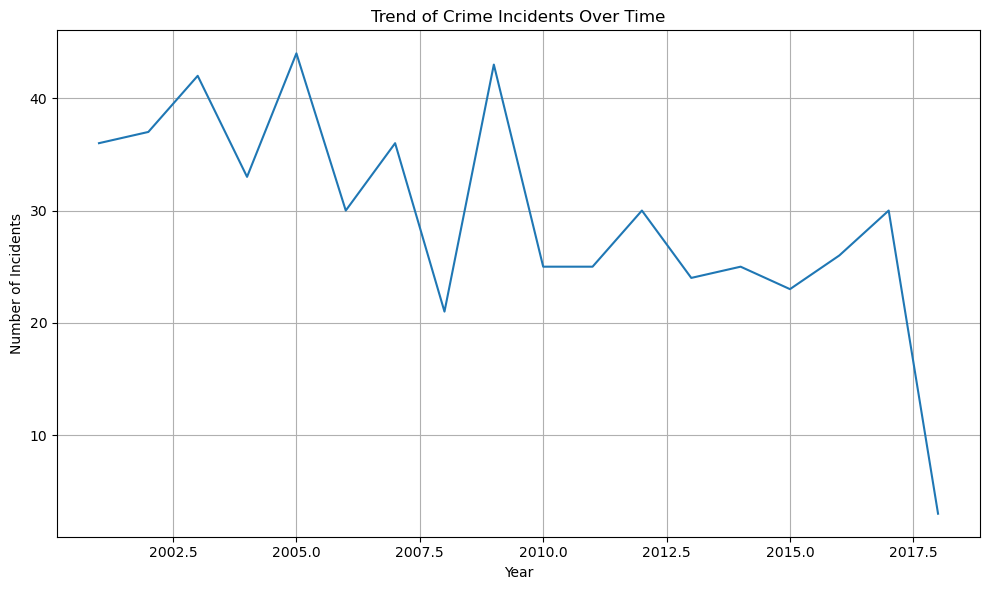

In [78]:
# Visualization 4: Trend of Crime Incidents Over Time
crime_data['DATE'] = pd.to_datetime(crime_data['DATE'])  # Convert 'DATE' column to datetime format
crime_data['Year'] = crime_data['DATE'].dt.year
crime_counts_yearly = crime_data.groupby('Year').size()
plt.figure(figsize=(10, 6))
crime_counts_yearly.plot()
plt.title('Trend of Crime Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

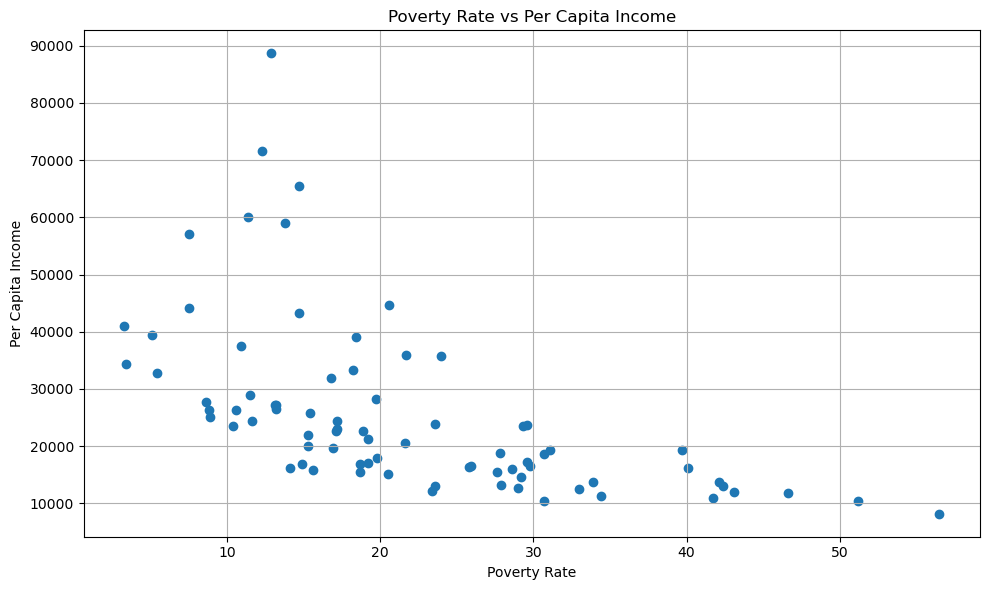

In [81]:
# Visualization 5: Scatter Plot for Poverty vs Per Capita Income
plt.figure(figsize=(10, 6))
plt.scatter(census_data['PERCENT_HOUSEHOLDS_BELOW_POVERTY'], census_data['PER_CAPITA_INCOME'])
plt.title('Poverty Rate vs Per Capita Income')
plt.xlabel('Poverty Rate')
plt.ylabel('Per Capita Income')
plt.grid(True)
plt.tight_layout()
plt.show()


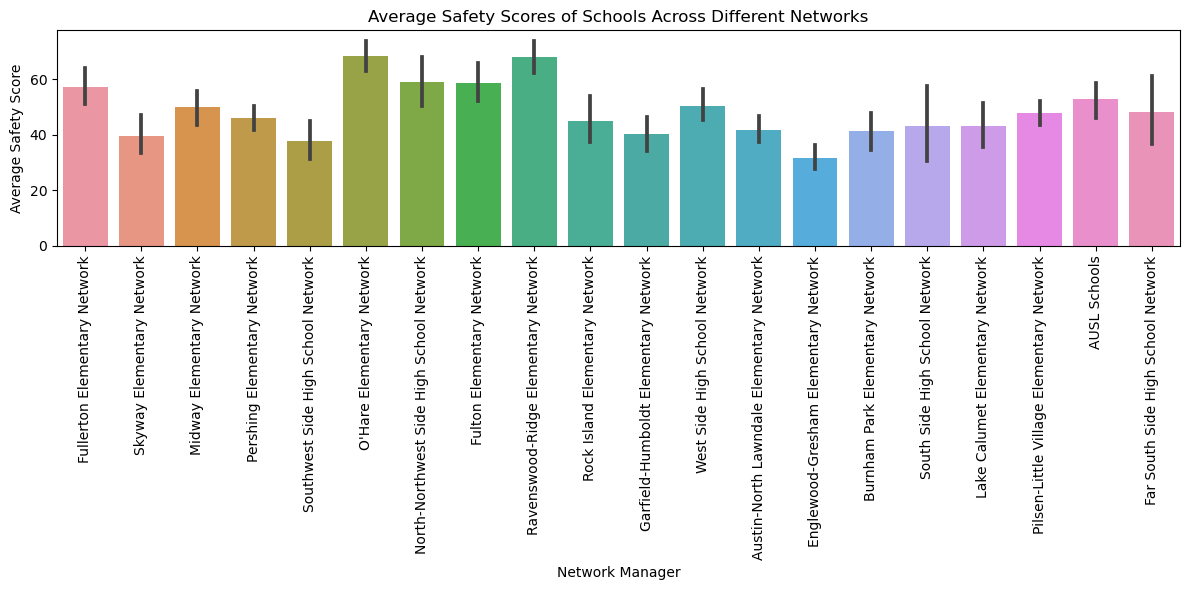

In [89]:
# Visualization 6: Compare the average safety scores of schools across different networks or collaborative names
plt.figure(figsize=(12, 6))
sns.barplot(x='Network_Manager', y='SAFETY_SCORE', data=schools_data)
plt.title('Average Safety Scores of Schools Across Different Networks')
plt.xlabel('Network Manager')
plt.ylabel('Average Safety Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<center><b>Trademark © Kliz John Millares</b></center>